In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # statistical data visualization
import matplotlib.pyplot as plt # plot bib


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


#dados = pd.read_csv(r'../input/house-prices-advanced-regression-techniques/data_description.txt',sep=';')

#dados =pd.read_csv(r'../input/house-prices-advanced-regression-techniques/sample_submission.csv')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### To open and show  the file data_description.txt in pandas

In [2]:
#with open('../input/house-prices-advanced-regression-techniques/data_description.txt') as f:
#    contents = f.read()
#    print(contents)
#dados =  open('../input/house-prices-advanced-regression-techniques/data_description.txt', 'r')


### Setando o tamanho dos gráficos a serem plotados

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Abrindo os arquivos necessários

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape, test.shape)

(1460, 81) (1459, 80)


### Printando o arquivo train

In [6]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Abrindo o train com describe que gera valores estatisticos

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### Criando uma correlação de gráficos do dataframe train

In [8]:
#sns.pairplot(train)

### Correlacionando todos os dados do Train segundo o coeficiente de correlação de Pearson e deixando visivel em um mapa de calor

<AxesSubplot:>

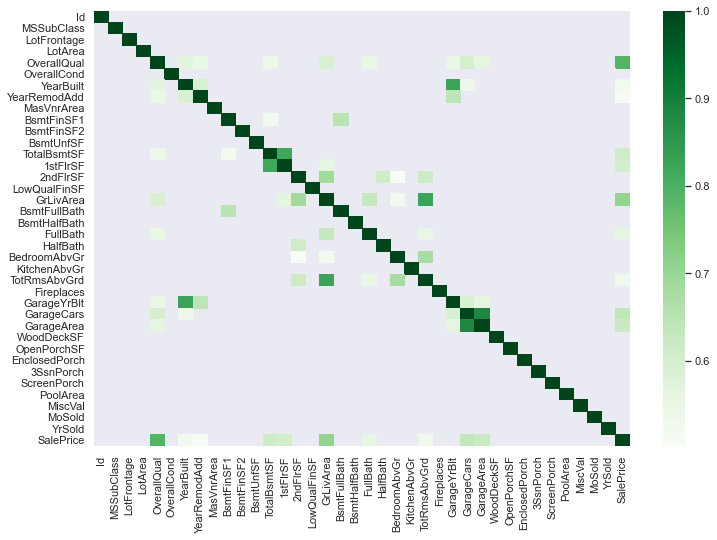

In [9]:
corr = train.corr()

kot = corr[((corr>=.5) | (corr <= -.5))]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

### Criando um dataFrame somente com as correlações superiores a |0.001| 

In [10]:
#plt.subplots(figsize=(50,50))
correlacao = train.corr() 
correlacao_media = correlacao[((correlacao >= .0001) | (correlacao <= -.0001)) & (correlacao !=1.000)] # colocando parametro entr .5 e -.5 e menor que 1 na correlacao
c0 = correlacao_media.unstack().sort_values(ascending = True).drop_duplicates() # transforamndo em series, colocando vlaores em ordem e retirando duplicatas
c0 = c0.to_frame() # transformando series em dataframe
c0 = c0.reset_index().rename(columns = {'level_0':'coluna1','level_1':'coluna2',0:'dados_correlacionados'}) # desnormaliza o dado ( cria as colunas necessarias) e renomeia
c0 = c0[(c0['coluna1'] == 'SalePrice') | (c0['coluna2'] == 'SalePrice')] # Pega a coluna 1 ou a 2 onde tem sale price e tira as que não possui
c0 = c0.reset_index(drop=True) # reseta novamente o index, fazendo com que os valores estejam ordenados (1,2,3,4...), e o drop = True retira a coluna index
c0

,coluna1,coluna2,dados_correlacionados
0,KitchenAbvGr,SalePrice,-0.135907
1,SalePrice,EnclosedPorch,-0.128578
2,SalePrice,MSSubClass,-0.084284
3,OverallCond,SalePrice,-0.077856
4,YrSold,SalePrice,-0.028923
5,LowQualFinSF,SalePrice,-0.025606
6,SalePrice,Id,-0.021917
7,SalePrice,MiscVal,-0.021190
8,SalePrice,BsmtHalfBath,-0.016844
9,SalePrice,BsmtFinSF2,-0.011378


### Passando todos os parâmetros SalePrice para a mesma coluna de forma a deixar nosso dataframe mais visual

In [11]:
def transformata(dataframe): # definindo uma funcao nova para pegar a string SalePrice da coluna2 e jogar na coluna1, e vice versa
    if dataframe['coluna2']== 'SalePrice': 
        a = dataframe['coluna1']
        dataframe['coluna1'] = dataframe['coluna2']
        dataframe['coluna2'] = a
        
        dataframe['dados_correlacionados'] *= -1 # como o dado é correlacionado e invertemos a correlação, precisamos inverter o valor do dado
    return dataframe
c1 = c0.apply(transformata,axis=1) # aplicado para varios dataframes, por exemplo aplicar nas colunas (axis=1)
c1

,coluna1,coluna2,dados_correlacionados
0,SalePrice,KitchenAbvGr,0.135907
1,SalePrice,EnclosedPorch,-0.128578
2,SalePrice,MSSubClass,-0.084284
3,SalePrice,OverallCond,0.077856
4,SalePrice,YrSold,0.028923
5,SalePrice,LowQualFinSF,0.025606
6,SalePrice,Id,-0.021917
7,SalePrice,MiscVal,-0.021190
8,SalePrice,BsmtHalfBath,-0.016844
9,SalePrice,BsmtFinSF2,-0.011378


### Queremos remover as colunas que não possuem correlação com o Preço de venda, verificamos que até uma correlação de 0.0001 continuamos com 37 itens com correlação, sendo que possuimos 81 colunas de itens, logo iremos remover elas diretamente ( o interessante de deixar neste formato é que as colunas estão ordenadas da menor para a maior correlação em módulo )

In [12]:
#for i, colunas in enumerate(train):
   # print(colunas)
    #if colunas == c1['coluna2']:
        #train.remove(colunas)
       # print(i)

    
copiandosale = train[['SalePrice']].copy()   #copia os valores da coluna SalePrice do dataframe train
colunas_escolhidas = c1['coluna2'].values #copia os nomes de coluna2
novo_train = train[colunas_escolhidas] # novo_train sera o novo dataframe no qual possui as colunas equivalentes aos itens da coluna2 de c1
novo_train['SalePrice'] = copiandosale # adiciona a coluna SalePrice no novo dataframe
novo_train
#print(len(colunas_train)) printa o tamanho da colunas_train


<ipython-input-12-caf1599e9234>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo_train['SalePrice'] = copiandosale # adiciona a coluna SalePrice no novo dataframe


,KitchenAbvGr,EnclosedPorch,MSSubClass,OverallCond,YrSold,LowQualFinSF,Id,MiscVal,BsmtHalfBath,BsmtFinSF2,...,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
0,1,0,60,5,2008,0,1,0,0,0,...,2003,8,2,856,856,548,2,1710,7,208500
1,1,0,20,8,2007,0,2,0,1,0,...,1976,6,2,1262,1262,460,2,1262,6,181500
2,1,0,60,5,2008,0,3,0,0,0,...,2001,6,2,920,920,608,2,1786,7,223500
3,1,272,70,5,2006,0,4,0,0,0,...,1915,7,1,961,756,642,3,1717,7,140000
4,1,0,60,5,2008,0,5,0,0,0,...,2000,9,2,1145,1145,836,3,2198,8,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0,60,5,2007,0,1456,0,0,0,...,1999,7,2,953,953,460,2,1647,6,175000
1456,1,0,20,6,2010,0,1457,0,0,163,...,1978,7,2,2073,1542,500,2,2073,6,210000
1457,1,0,70,9,2010,0,1458,2500,0,0,...,1941,9,2,1188,1152,252,1,2340,7,266500
1458,1,112,20,6,2010,0,1459,0,0,1029,...,1950,5,1,1078,1078,240,1,1078,5,142125


### verificando quais colunas foram excluidas podemos notar que foram excluídas colunas que nao possuiam valor numerico, e sim dados úteis em forma de string, ou seja que valem a pena serem analisados também mas de forma separada 

In [13]:
colunas_escolhidas = c1['coluna2'].values
excluido_train = train.drop(colunas_escolhidas,axis=1)
excluido_train

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,175000
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,210000
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal,266500
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,142125


### Iremos fazer um pequeno tratamento de dados no LotArea para deixar a correlação de dados mais interessante com o SalePrice
### ( foram  feitas analises aleatoriamente antes de fazer a correlação de pearson, o que possibilitou um insight no qual com um tratamento simples nos dados os valores do coeficiente de pearson do LotArea foram de 0.26 (irrelevantes) para 0.4(pouco relevantes) o que nos mostra que mesmo os dados que possuem pouca correlação inicial precisam de um tratamento de dados antes de serem avaliados )


In [14]:
### Transformando coluna de área construida de ft2 para m2
#def pes2_para_metros2(x): # definindo uma funcao nova para pegar a colunar GrLivArea do novo_df e transformando de ft2 para m2
    #m2 = x/10.764
    #return m2
#novo_df.apply(pes2_para_metros2,axis=1) # aplicado para varios dataframes, por exemplo aplicar nas colunas
#novo_df['GrlivAreaM2'] = novo_df['GrLivArea'].apply(pes2_para_metros2)
#novo_df

In [15]:
novo_train.describe().T

,count,mean,std,min,25%,50%,75%,max
KitchenAbvGr,1460.0,1.046575,0.220338,0.0,1.00,1.0,1.00,3.0
EnclosedPorch,1460.0,21.954110,61.119149,0.0,0.00,0.0,0.00,552.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YrSold,1460.0,2007.815753,1.328095,2006.0,2007.00,2008.0,2009.00,2010.0
LowQualFinSF,1460.0,5.844521,48.623081,0.0,0.00,0.0,0.00,572.0
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MiscVal,1460.0,43.489041,496.123024,0.0,0.00,0.0,0.00,15500.0
BsmtHalfBath,1460.0,0.057534,0.238753,0.0,0.00,0.0,0.00,2.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


### Distribuição da área do lote (LotArea)
    
    Notamos que havia um desvio padrão muito grande para esse campo, que representa o tamanho do lote total (LotArea) veremos essa distribuição no dataset
    Analisando o gráfico abaixo podemos verificar que a maioria dos registros do dataset estão entre 0 e 21k, sendo que ele possui um desvio padrão alto, ou seja, a maior parte dos dados está concentrada em uma parte do gráfico ao invés de disperso ao longo dele.
    Um fator interessante do gráfico de distribuição é que ele não precisa de dois parâmetros, ele vê a quantidade de um parametro e quantas vezes ele aparece
    

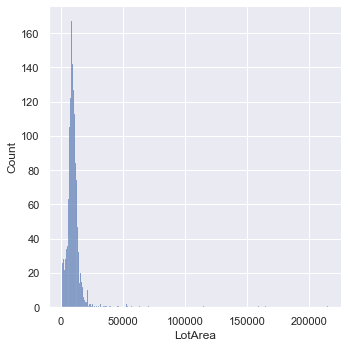

In [16]:
sns.displot(novo_train.LotArea)

#Tamanho do lote total = LotArea

### Analisando o gráfico abaixo
    
    Como o gráfico de dispersão ( sctterplot ) nos mostra que os dados acima de 50000 ft^2 são poucos, iremos ignorar valores acima deste valor, iremos fazer uma analise de threshold para saber valores exatos que podem ser analisados

E:\Users\Wolfgang\Documents\fga\PYTHON\ANACONDA INSTALADA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

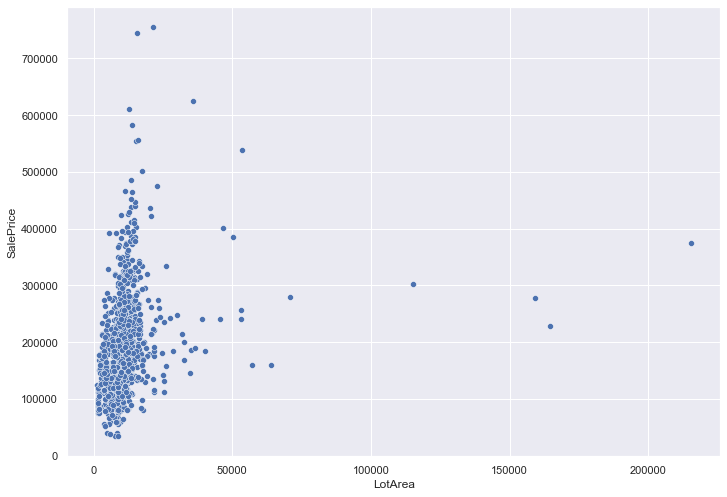

In [17]:
sns.scatterplot(novo_train.LotArea,novo_train.SalePrice)

### Criando um threshold para os percentis do gráfico de dispersão

In [18]:
percentil_threshold = novo_train['LotArea'].quantile(q=[0.75, 0.80, 0.85, 0.90, 0.95])

my_threshold_lotarea = percentil_threshold[0.90]
my_threshold_lotarea


14381.70000000001

### Pegando somente os valores acima do threshold selecionado, Podemos Verificar que só são 146 valores acima do percentil de 90%, dos 1460 (como deveria ser, 10% de 1460), ou seja, e que o salto numérico entre os 90% para os demais percentis será muito danoso e causará erros de análise, logo serão removidos dos dados para os passos a seguir

In [19]:
novo_train_lotarea = novo_train
novo_train_lotarea[novo_train_lotarea['LotArea'] > my_threshold_lotarea]

,KitchenAbvGr,EnclosedPorch,MSSubClass,OverallCond,YrSold,LowQualFinSF,Id,MiscVal,BsmtHalfBath,BsmtFinSF2,...,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
28,1,0,20,6,2006,0,29,0,0,0,...,1957,6,1,1600,1484,319,1,1600,5,207500
41,1,0,20,6,2007,0,42,0,1,0,...,1959,5,1,1328,1350,308,1,1328,5,170000
53,1,0,20,5,2006,0,54,0,0,0,...,1981,5,0,1842,1842,894,3,1842,9,385000
66,1,0,20,5,2010,0,67,0,0,0,...,1970,7,2,2207,1947,576,2,2207,7,180000
69,1,114,50,4,2006,0,70,0,0,0,...,1953,7,2,1304,1304,667,2,2287,7,225000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,1,0,80,7,2006,0,1424,0,0,0,...,1966,8,2,1575,697,432,2,2201,6,274970
1430,1,0,60,5,2006,0,1431,0,0,0,...,2005,7,2,734,732,372,2,1838,5,192140
1434,1,0,20,5,2006,0,1435,0,0,0,...,1977,5,2,1126,1126,484,2,1126,5,160000
1446,1,0,20,7,2010,0,1447,0,0,0,...,1962,6,1,1188,1188,312,1,1188,5,157900


###  Retirando os valores que não quero no dataframe

In [20]:
percentil90_lotarea_df = novo_train_lotarea[novo_train_lotarea['LotArea'] <= my_threshold_lotarea]
percentil90_lotarea_df

,KitchenAbvGr,EnclosedPorch,MSSubClass,OverallCond,YrSold,LowQualFinSF,Id,MiscVal,BsmtHalfBath,BsmtFinSF2,...,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
0,1,0,60,5,2008,0,1,0,0,0,...,2003,8,2,856,856,548,2,1710,7,208500
1,1,0,20,8,2007,0,2,0,1,0,...,1976,6,2,1262,1262,460,2,1262,6,181500
2,1,0,60,5,2008,0,3,0,0,0,...,2001,6,2,920,920,608,2,1786,7,223500
3,1,272,70,5,2006,0,4,0,0,0,...,1915,7,1,961,756,642,3,1717,7,140000
4,1,0,60,5,2008,0,5,0,0,0,...,2000,9,2,1145,1145,836,3,2198,8,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0,60,5,2007,0,1456,0,0,0,...,1999,7,2,953,953,460,2,1647,6,175000
1456,1,0,20,6,2010,0,1457,0,0,163,...,1978,7,2,2073,1542,500,2,2073,6,210000
1457,1,0,70,9,2010,0,1458,2500,0,0,...,1941,9,2,1188,1152,252,1,2340,7,266500
1458,1,112,20,6,2010,0,1459,0,0,1029,...,1950,5,1,1078,1078,240,1,1078,5,142125


### Pegando apenas algumas colunas do percentil 90 para poder fazer um mapa de calor que seja possivel a leitura

In [21]:
percentil90_lotarea_df1 = percentil90_lotarea_df[['LotArea','SalePrice'] ]
percentil90_lotarea_df1

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
...,...,...
1455,7917,175000
1456,13175,210000
1457,9042,266500
1458,9717,142125


### Fazendo um mapa de calor do dataframe "percentil90" para demonstrar que um simples tratamento de dados fez com que  o Lot area pelo "SalePrice" saiu de 0.26 do arquivo original (train) e agora passa a ser 0.4

<AxesSubplot:>

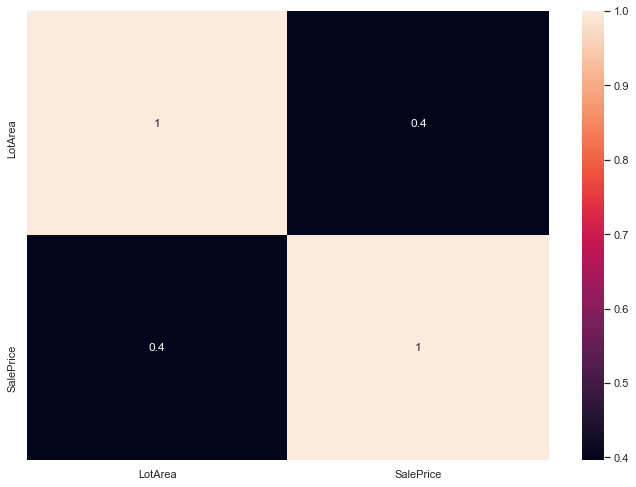

In [22]:
sns.heatmap(data = percentil90_lotarea_df1.corr(), annot = True)

### Analisando o mapa de calor acima, podemos verificar que a correlação da área da piscina não influencia em nada com nenhum dos outros fatores ( este método utiliza a correlação de Pearson, ver mais em: https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson ), correlações entre 0 e 0.3 são despreziveis, 0.3 a 0.5 são fracas, ou seja, olhando para nosso mapa de calor, poderiamos desprezar a análise do BedroomAbvGrd, PoolArea e o LotArea ( como ja havia feito a analise do LotArea eu vou manter a baixo esse dado ). 

### Agora analisando o gráfico abaixo, podemos ver uma leve tendência à o aumento de área aumentar o valor da venda da casa, ainda temos que fazer análises mais densas para chegar a alguma conclusão.

### O nome dessa remoção de dados chama-se remoção de outliers

E:\Users\Wolfgang\Documents\fga\PYTHON\ANACONDA INSTALADA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

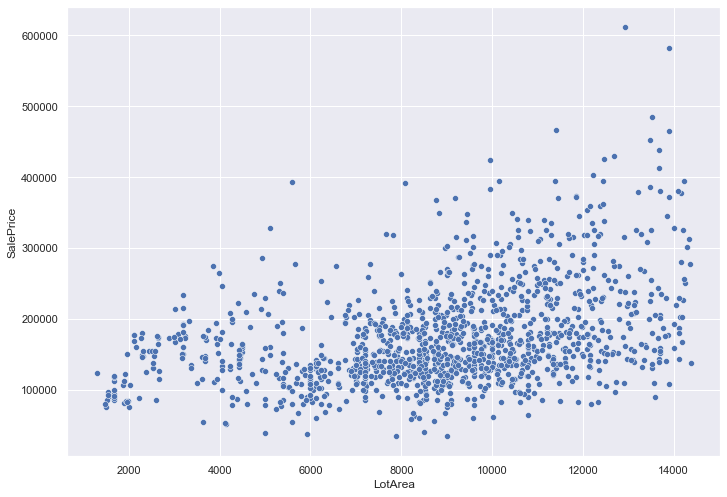

In [23]:
sns.scatterplot(percentil90_lotarea_df.LotArea,percentil90_lotarea_df.SalePrice)

### Adicionando uma linha de tendência ao gráfico podemos notar que existe uma certa tendência ao aumento de preço com relação ao lote, veremos mais a fundo os próximos dados

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

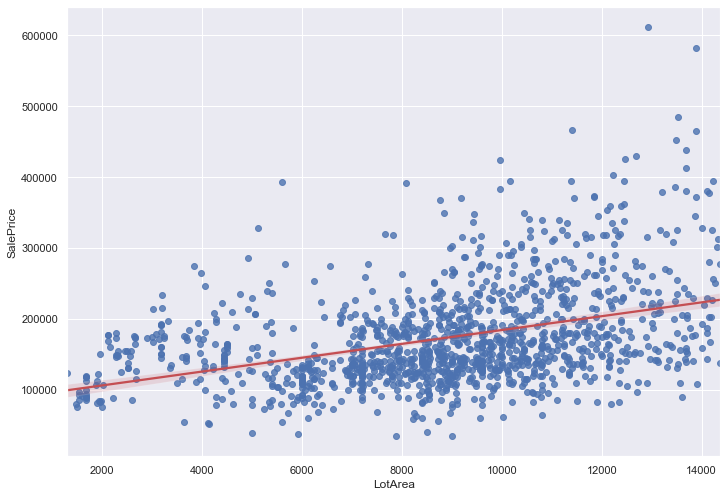

In [24]:
sns.regplot(x = 'LotArea', y = 'SalePrice', data = percentil90_lotarea_df, color = 'b', line_kws = {'color':'r'} )

In [25]:
#sns.pairplot(percentil90_lotarea_df)

### Agora iremos tratar os dados  do GrlivArea que é o que está construido acima do porão:
### Começando por um mapa de distribuição podemos verificar que o mesmo que aconteceu com o Lot Area se repete em que a maior parte dos dados se encontra com uma assimetria (obliquidade) positiva, ou seja, possui muitas casas sendo vendidas a valores baixos com pouquissimos dados relevantes a preços elevados

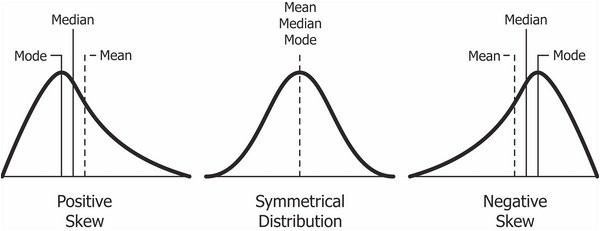

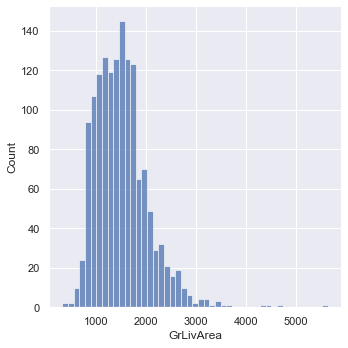

In [26]:
sns.displot(novo_train.GrLivArea)

### Logo será necessário um pequeno tratamento de dados para aumentar a relevância desses dados (que já esta em 0.71 sem tratamento, mas será bom analisar com o mesmo parâmetro de percentil 90% que foi utilizado no LotArea)
### Verificando os percentis 0.7  até 0.95

In [27]:
percentil_threshold_grlivarea = novo_train['GrLivArea'].quantile(q=[0.75, 0.80, 0.85, 0.90, 0.95])
percentil_threshold_grlivarea

0.75    1776.75
0.80    1869.00
0.85    1987.30
0.90    2158.30
0.95    2466.10
Name: GrLivArea, dtype: float64

### separando um marcador do percentil 90

In [28]:
my_threshold_grlivarea = percentil_threshold_grlivarea[0.90]
my_threshold_grlivarea

2158.3

### Criando um novo dataframe com apenas os dados percentil 90 do GrLivArea

In [29]:
novo_train_grlivarea = novo_train
percentil90_grlivarea_df = novo_train_grlivarea[novo_train_grlivarea['GrLivArea'] <= my_threshold_grlivarea]



### Criando um novo data frame percentil 90 do GRlivarea com menos dados para gerar um mapa de calor e verificar a correlacao


In [30]:
percentil90_grlivarea_df1 = percentil90_grlivarea_df[['GrLivArea','SalePrice'] ]
percentil90_grlivarea_df1

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
5,1362,143000
...,...,...
1454,1221,185000
1455,1647,175000
1456,2073,210000
1458,1078,142125


### Podemos notar que após o percentil 90 ser aplicado, a corelação entre GrLivArea e SalePrice diminuiu.

In [31]:
percentil90_grlivarea_df1.corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.667777
SalePrice,0.667777,1.000000


### plot de dispersão antes do tratamento percentil 90

E:\Users\Wolfgang\Documents\fga\PYTHON\ANACONDA INSTALADA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

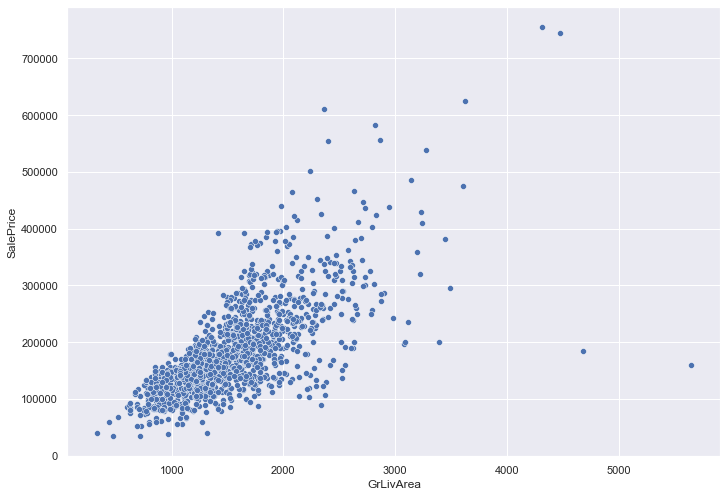

In [32]:
sns.scatterplot(novo_train.GrLivArea,novo_train.SalePrice)

#Area construida = GrLivArea

### plot de dispersão depois do tratamento percentil 90

E:\Users\Wolfgang\Documents\fga\PYTHON\ANACONDA INSTALADA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

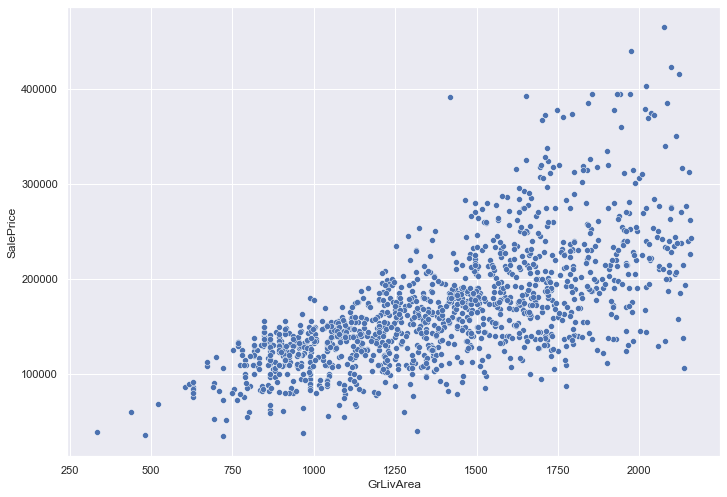

In [33]:
sns.scatterplot(percentil90_grlivarea_df1.GrLivArea,percentil90_grlivarea_df1.SalePrice)

### Utilizando regrssão linear  para o percentil90 do GrLivArea

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

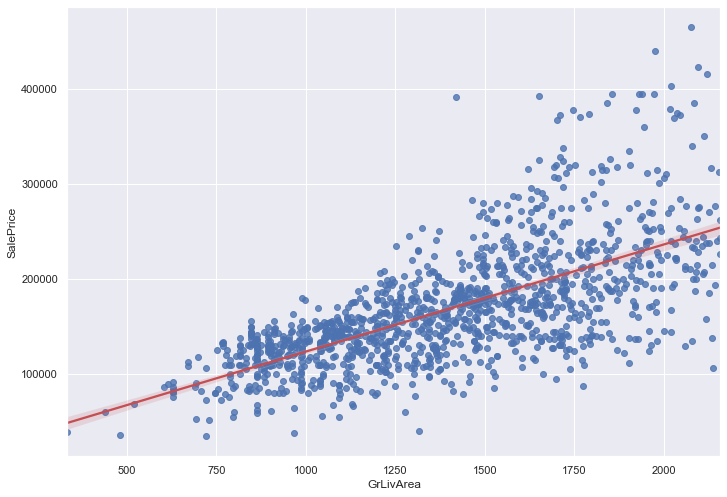

In [34]:
sns.regplot(x = 'GrLivArea', y = 'SalePrice', data = percentil90_grlivarea_df1, color = 'b', line_kws = {'color':'r'})

### Utilizando regressão linear para o GrLivArea sem o tratamento de dados

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

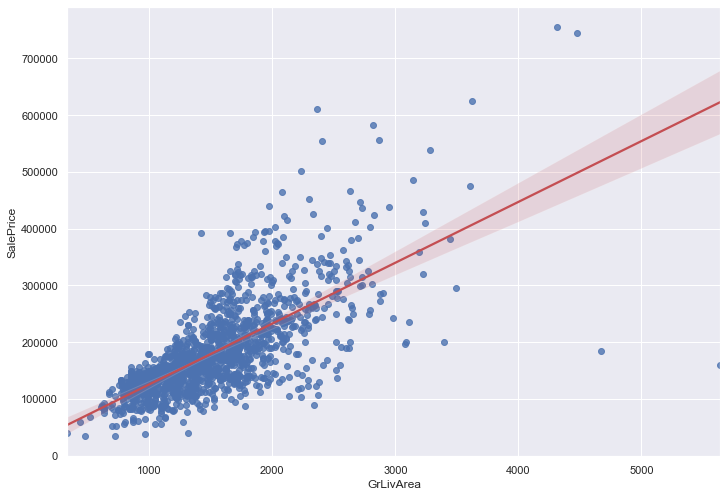

In [35]:
sns.regplot(x = 'GrLivArea', y = 'SalePrice', data = novo_train, color = 'b', line_kws = {'color':'r'})

### Com essa análise podemos verificar que nem sempre remover dados distoantes é bom para o aumento da correlação de um dado, cada caso deverá ser analisado isoladamente, um bom indicador para verificar se o dado precisa ser tratado é o desvio padrão, pois se ele for muito alto deverá haver dados que podem ser removidos sem maiores problemas, outro fator interessante para esta análise e verificar se os percentis avançam de forma linear ou de repente os números sobem de maneira estranha, isso pode indicar apenas dados pontuais que fazem essa quebra na linearidade, por fim é bom olhar se a mediana condiz com alguns valores de percentil e media, todos esses fatores farão com que a análise seja mais fluida e analises desnecessárias como o tratamento de dado do GrLivArea sejam descartadas logo de inicio.

### tendo em vista estes fatores, podemos afirmar que não existe necessidade de tratar pelo método mostrado neste projeto os outros dados, podemos assim voltar a analisar pelo coeficiente de pearson (corr) acima de 0.46 todos os dados anteriores

#### Lembrar de adicionar o LotArea modificado dentro do novo_train mesmo com colunas a menos e correlacionar e fazer um novo mapa somente com dados acima de 0.46

### Feature engineering : cria variaveis novas a partir das que ja existe, por exemplo transformar a correlação pool area de 0 = nao tem piscina e o que for diferente de 0 ser igual a ter piscina (1) e ai analisar a correlação entre ele e o SalePrice